<a href="https://colab.research.google.com/github/vikaschaudhary53/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction(ML_Regression_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project-Linear Regression/SeoulBikeData.csv'

In [4]:
df = pd.read_csv(file_path, encoding="ISO-8859–1")

In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
df.shape

(8760, 14)

In [8]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
#Rename the Columns
column_dict = {'Date':'date', 'Rented Bike Count':'rented_bikes', 'Hour':'hour', 'Temperature(°C)':'temperature', 'Humidity(%)':'humidity', 'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility', 
               'Dew point temperature(°C)':'dew_point_temperature','Solar Radiation (MJ/m2)':'solar_radition', 'Rainfall(mm)':'rainfall', 'Snowfall (cm)': 'snowfall', 'Seasons':'seasons', 'Holiday':'holiday', 'Functioning Day':'functioning_day'}

In [10]:
df.rename(columns= column_dict, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bikes           8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radition         8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowfall               8760 non-null   float64
 11  seasons                8760 non-null   object 
 12  holiday                8760 non-null   object 
 13  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [12]:
df.describe()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [13]:
len(df[df.duplicated()])

0

In [14]:
df.nunique()

date                      365
rented_bikes             2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radition            345
rainfall                   61
snowfall                   51
seasons                     4
holiday                     2
functioning_day             2
dtype: int64

In [15]:
len(df['date'].value_counts())*len(df['hour'].value_counts())

8760

####Extracting the 'date', 'month' from complete date

In [16]:
df['date'] = df['date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [17]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()

In [18]:
df['week'] = df['day_name'].apply(lambda x: "weekend" if x=='Saturday' or x == 'Sunday' else 'weekday')

In [19]:
df.head()

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday


In [20]:
df.columns

Index(['date', 'rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radition', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'year', 'month',
       'month_name', 'day', 'day_name', 'week'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8760 non-null   datetime64[ns]
 1   rented_bikes           8760 non-null   int64         
 2   hour                   8760 non-null   int64         
 3   temperature            8760 non-null   float64       
 4   humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radition         8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowfall               8760 non-null   float64       
 11  seasons                8760 non-null   object        
 12  holiday                8760 non-null   object        
 13  fun

In [22]:
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

In [23]:
df['functioning_day'].value_counts()

Yes    8465
No      295
Name: functioning_day, dtype: int64

In [24]:
df[(df['holiday']=='Holiday') & (df['functioning_day']=='No')]

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
7488,2018-10-09,0,0,12.6,54,0.2,2000,3.5,0.00,0.0,0.0,Autumn,Holiday,No,2018,10,October,9,Tuesday,weekday
7489,2018-10-09,0,1,12.0,58,0.7,2000,3.9,0.00,0.0,0.0,Autumn,Holiday,No,2018,10,October,9,Tuesday,weekday
7490,2018-10-09,0,2,11.4,65,1.1,2000,5.0,0.00,0.0,0.0,Autumn,Holiday,No,2018,10,October,9,Tuesday,weekday
7491,2018-10-09,0,3,11.0,66,0.9,2000,4.8,0.00,0.0,0.0,Autumn,Holiday,No,2018,10,October,9,Tuesday,weekday
7492,2018-10-09,0,4,11.0,63,0.8,2000,4.2,0.00,0.0,0.0,Autumn,Holiday,No,2018,10,October,9,Tuesday,weekday
7493,2018-10-09,0,5,10.8,64,0.8,2000,4.2,0.00,0.0,0.0,Autumn,Holiday,No,2018,10,October,9,Tuesday,weekday
7494,2018-10-09,0,6,10.8,69,0.8,2000,5.3,0.00,0.0,0.0,Autumn,Holiday,No,2018,10,October,9,Tuesday,weekday
7495,2018-10-09,0,7,10.9,70,0.7,2000,5.6,0.00,0.0,0.0,Autumn,Holiday,No,2018,10,October,9,Tuesday,weekday
7496,2018-10-09,0,8,11.4,66,0.8,1991,5.2,0.18,0.0,0.0,Autumn,Holiday,No,2018,10,October,9,Tuesday,weekday
7497,2018-10-09,0,9,12.8,57,1.2,1838,4.4,0.55,0.0,0.0,Autumn,Holiday,No,2018,10,October,9,Tuesday,weekday


In [25]:
df[(df['holiday']=='No Holiday') & (df['functioning_day']=='No')]

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April,11,Wednesday,weekday
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April,11,Wednesday,weekday
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April,11,Wednesday,weekday
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April,11,Wednesday,weekday
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April,11,Wednesday,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November,9,Friday,weekday
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November,9,Friday,weekday
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November,9,Friday,weekday
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November,9,Friday,weekday


In [26]:
df[(df['holiday']=='No Holiday') & (df['functioning_day']=='Yes')]

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday


In [27]:
df[(df['rented_bikes']==0) & (df['functioning_day']=='Yes')]

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week


In [28]:
#dropping rows with 0 bike rental
df = df[df['rented_bikes']>0]

In [29]:
df

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday


In [30]:
df['functioning_day'].value_counts()

Yes    8465
Name: functioning_day, dtype: int64

In [31]:
#Dropping the 'functioning_day' column
df.drop(columns='functioning_day', inplace=True)

In [32]:
df.columns

Index(['date', 'rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radition', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'year', 'month', 'month_name', 'day',
       'day_name', 'week'],
      dtype='object')

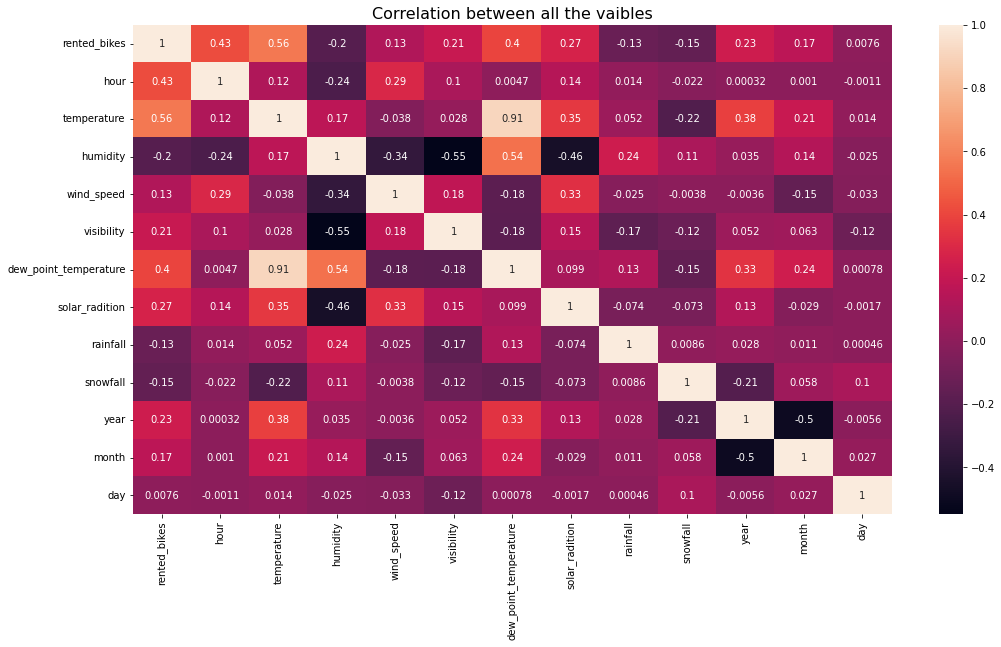

In [33]:
#Heatmap for co-relation in features
plt.figure(figsize=(17, 9))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [34]:
#Since the 'temperature' column is highly correlated with 'dew_point_temperature' we will remove 'dew_point_temperature' and also remove the 'date' column
df.drop(columns= ['date','dew_point_temperature'], inplace=True)

In [35]:
df.head()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radition,rainfall,snowfall,seasons,holiday,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday


###EDA of Every Feature

In [36]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radition', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'year', 'month', 'month_name', 'day', 'day_name', 'week'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rented_bikes    8465 non-null   int64  
 1   hour            8465 non-null   int64  
 2   temperature     8465 non-null   float64
 3   humidity        8465 non-null   int64  
 4   wind_speed      8465 non-null   float64
 5   visibility      8465 non-null   int64  
 6   solar_radition  8465 non-null   float64
 7   rainfall        8465 non-null   float64
 8   snowfall        8465 non-null   float64
 9   seasons         8465 non-null   object 
 10  holiday         8465 non-null   object 
 11  year            8465 non-null   int64  
 12  month           8465 non-null   int64  
 13  month_name      8465 non-null   object 
 14  day             8465 non-null   int64  
 15  day_name        8465 non-null   object 
 16  week            8465 non-null   object 
dtypes: float64(5), int64(7), object(5

In [38]:
numerical_columns = ['rented_bikes','hour','temperature','humidity','wind_speed','visibility','solar_radition','rainfall','snowfall','month','day']

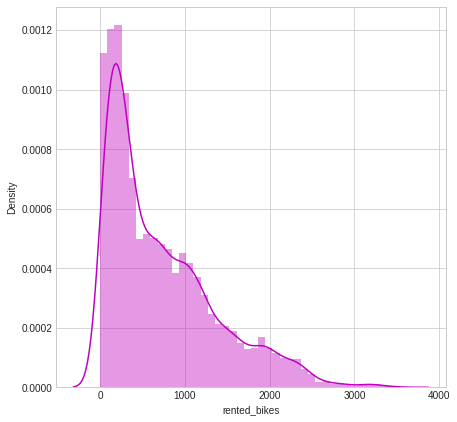

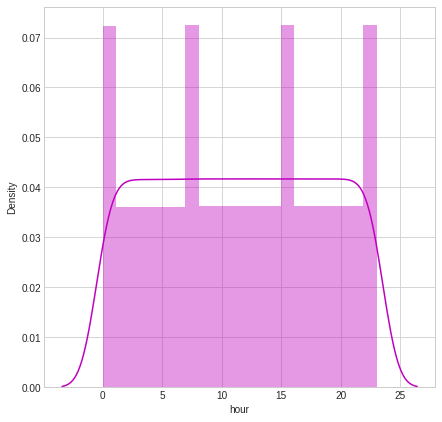

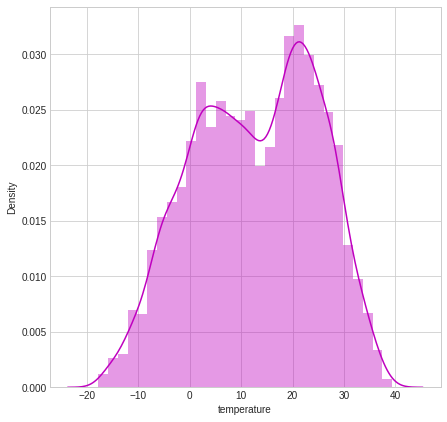

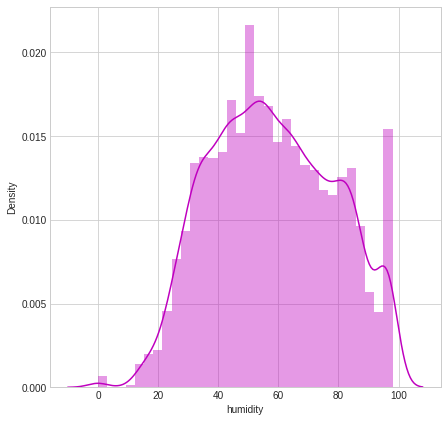

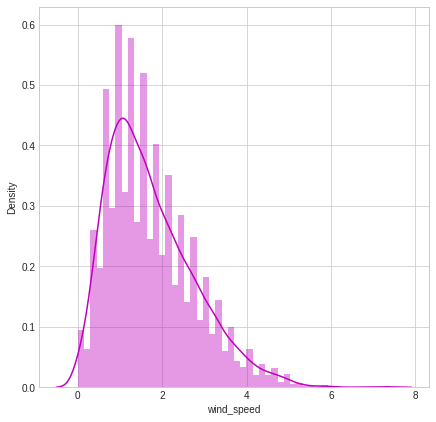

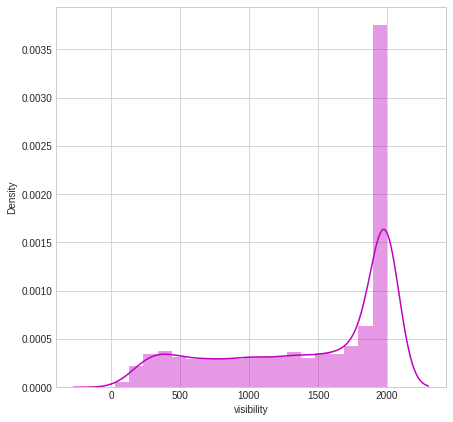

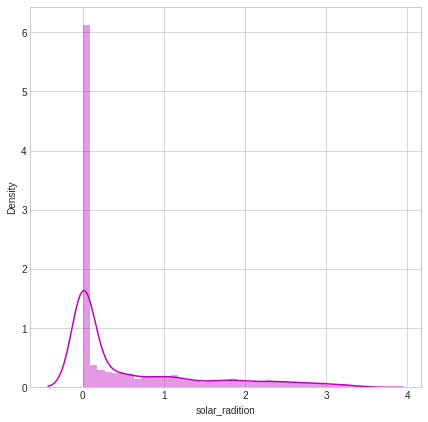

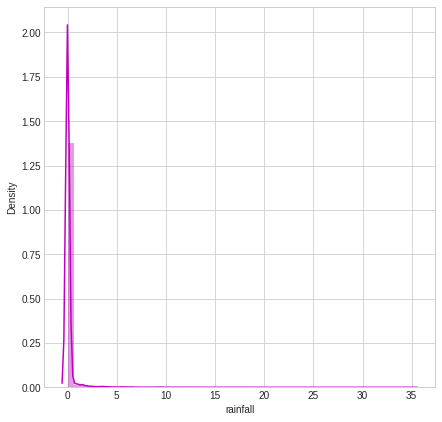

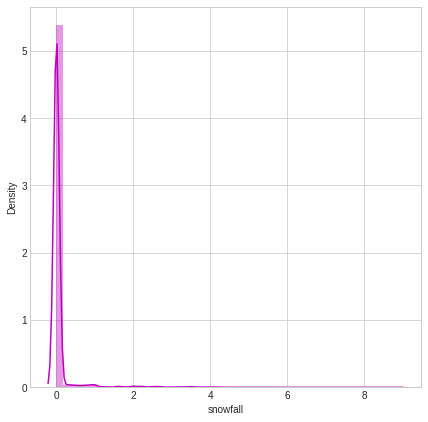

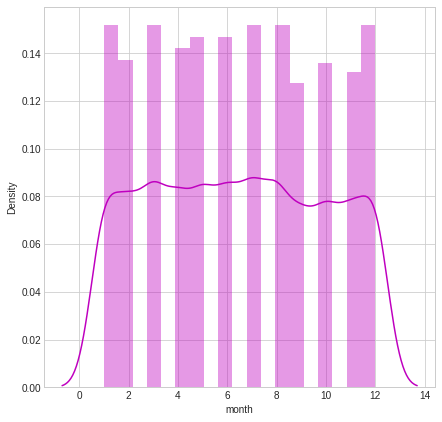

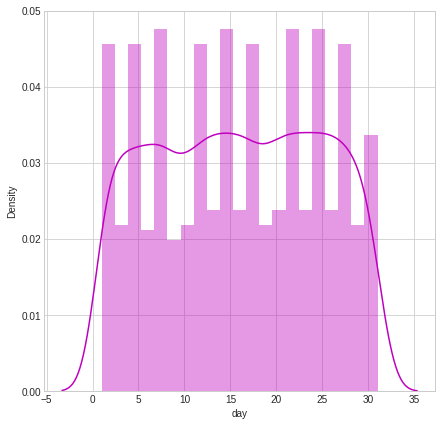

In [39]:
#distplot for numerical features
for val in numerical_columns:
  plt.figure(figsize=(7,7))
  plt.style.use('seaborn-whitegrid')
  sns.distplot(df[val],color="m")
  plt.show()

In [40]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radition', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'year', 'month', 'month_name', 'day', 'day_name', 'week'],
      dtype='object')

####Bar Graphs for Rented Bikes and other features

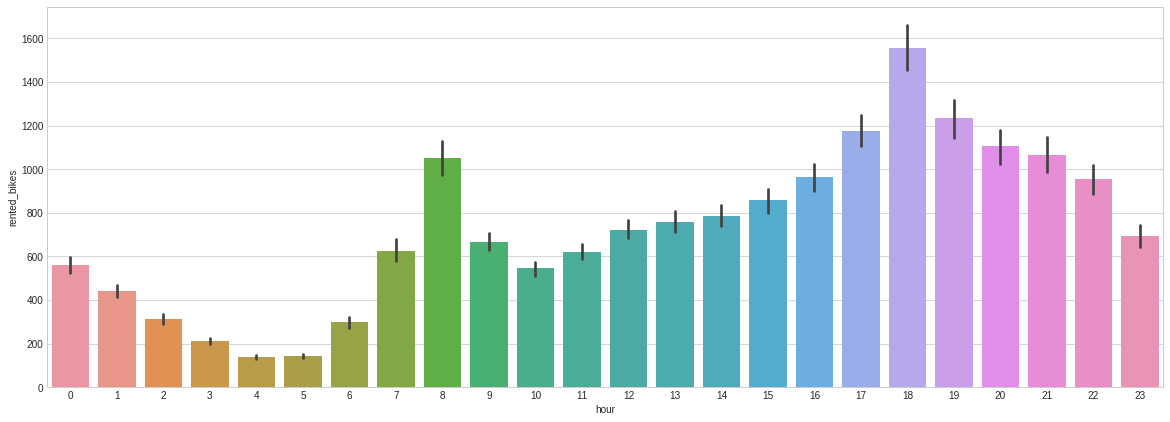

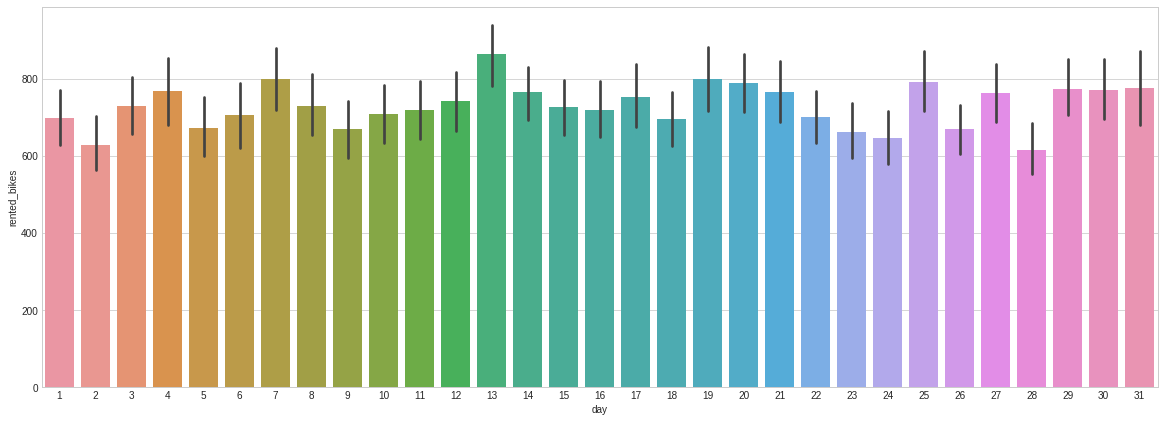

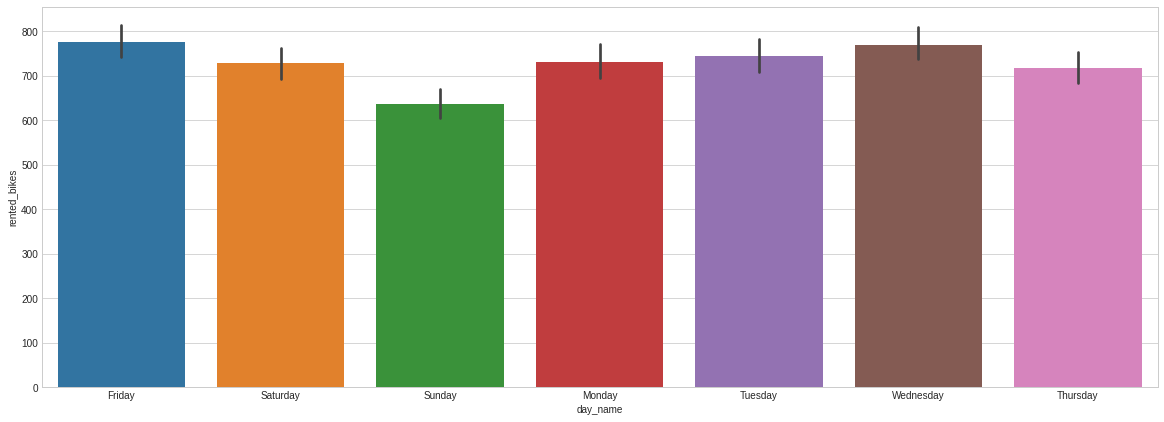

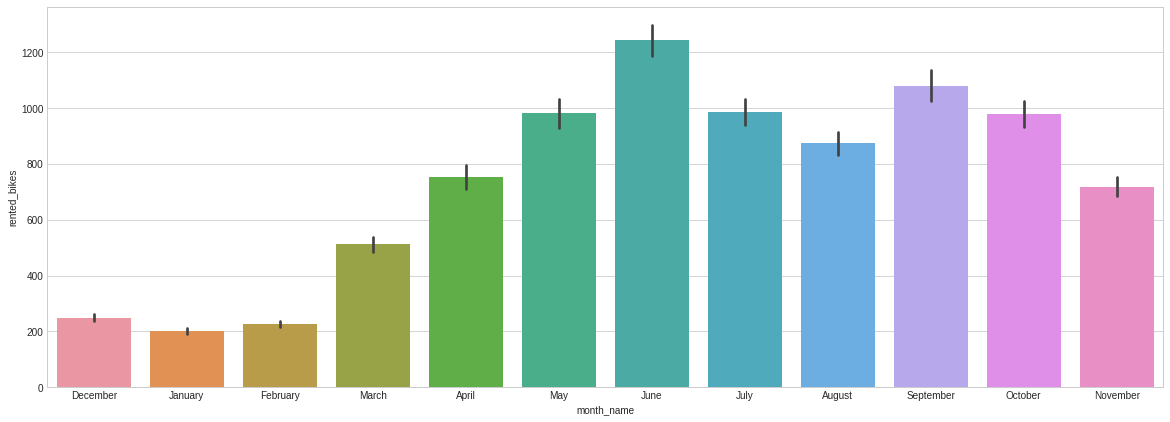

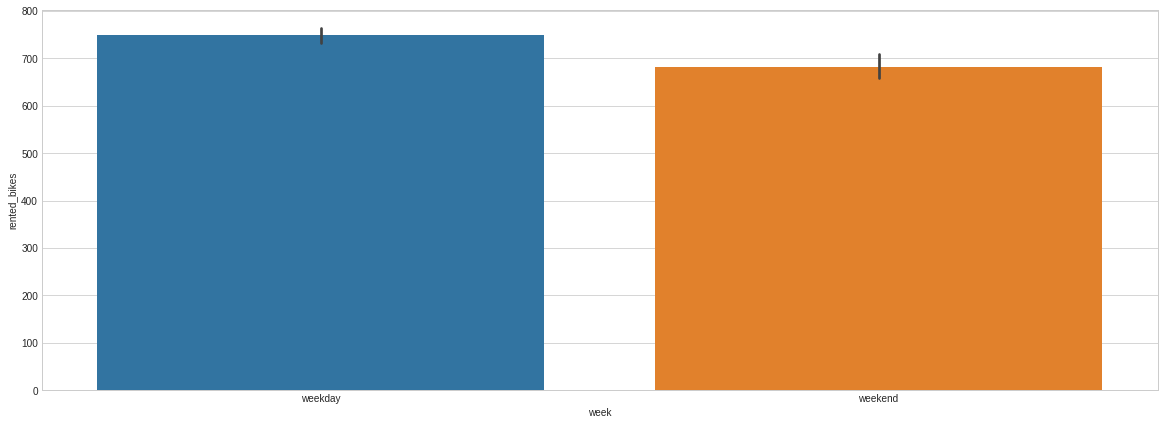

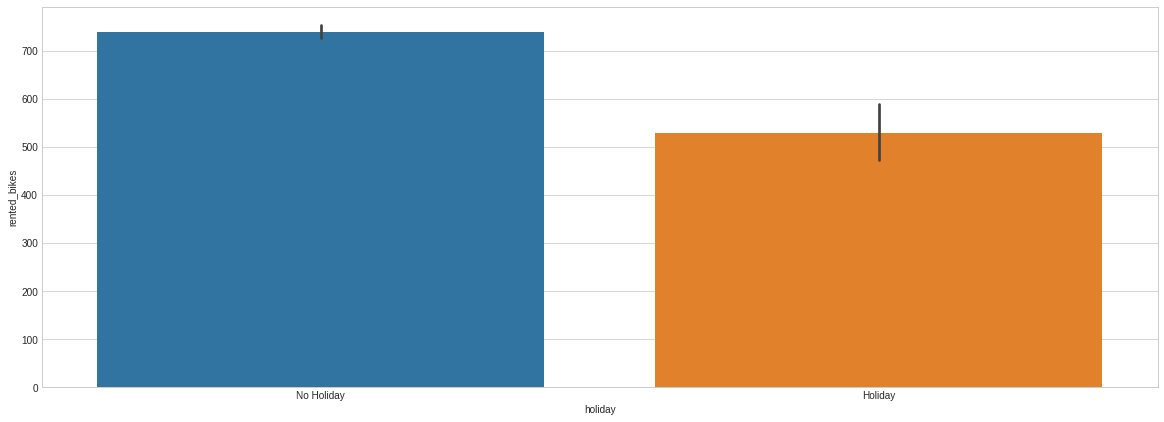

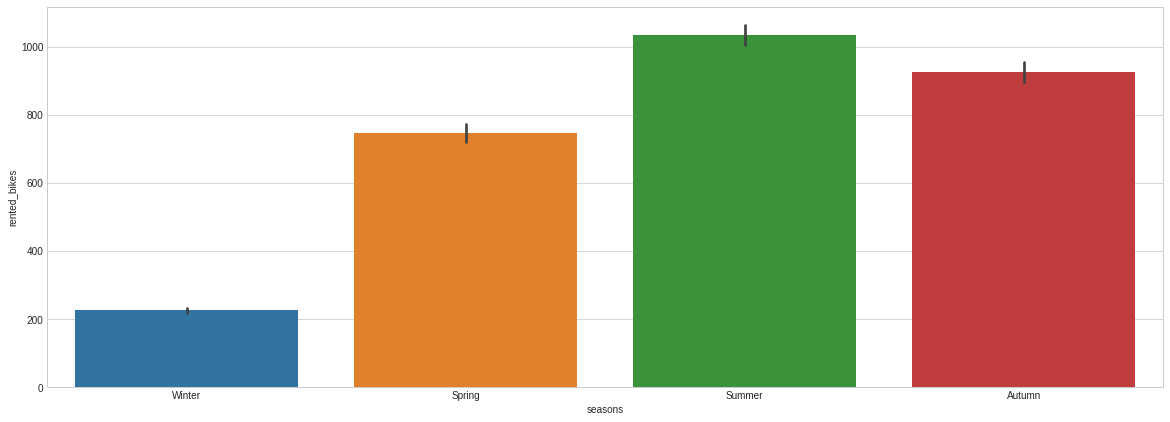

In [41]:
list = ['hour','day', 'day_name', 'month_name', 'week','holiday','seasons']
for col in list:
  plt.figure(figsize=(20,7))
  plt.style.use('seaborn-whitegrid')
  plots = sns.barplot(data=df,x=col,y='rented_bikes')

####Check Outliars

In [42]:
print("Skewness: %f" % df['rented_bikes'].skew())
print("Kurtosis: %f" % df['rented_bikes'].kurt())

Skewness: 1.139700
Kurtosis: 0.820305


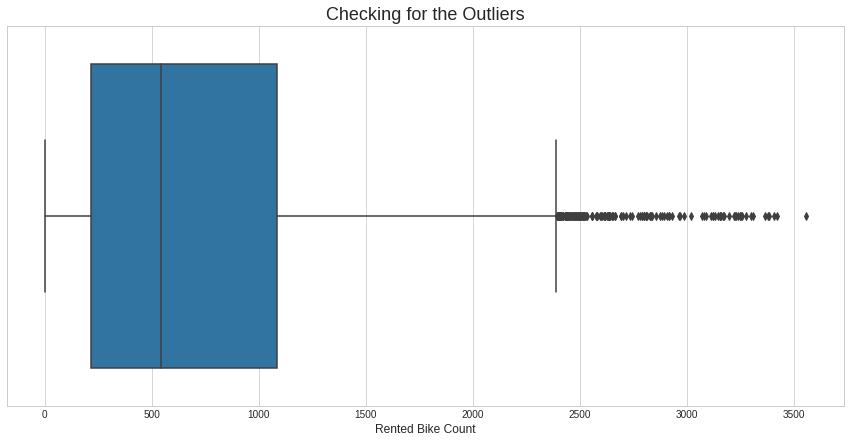

In [43]:
#box plot
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.boxplot(x=df['rented_bikes'])
plt.title('Checking for the Outliers', size=18)
plt.xlabel('Rented Bike Count', size=12)
plt.show()

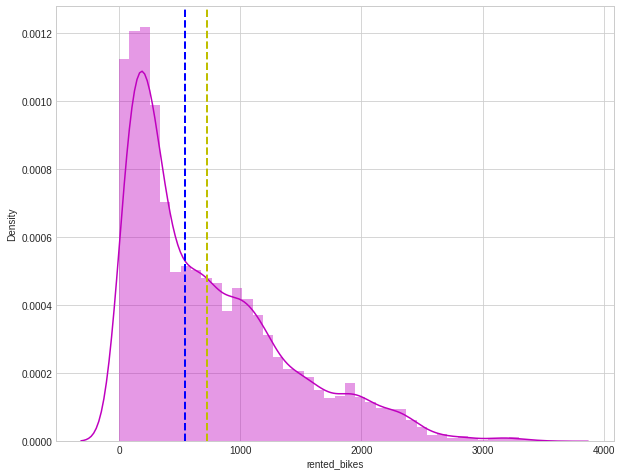

In [44]:
#Remove the skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
ax=sns.distplot(df['rented_bikes'],color="m")
ax.axvline((df['rented_bikes']).mean(), color='y', linestyle='dashed', linewidth=2)
ax.axvline((df['rented_bikes']).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()


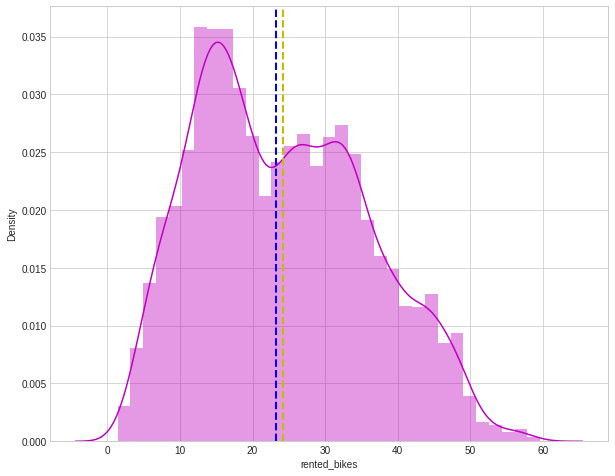

In [45]:
#Let's apply square root to reduce skewness
#Remove the skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
#plt.ylabel('Density')
ax=sns.distplot(np.sqrt(df['rented_bikes']),color="m")
ax.axvline(np.sqrt(df['rented_bikes']).mean(), color='y', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['rented_bikes']).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()

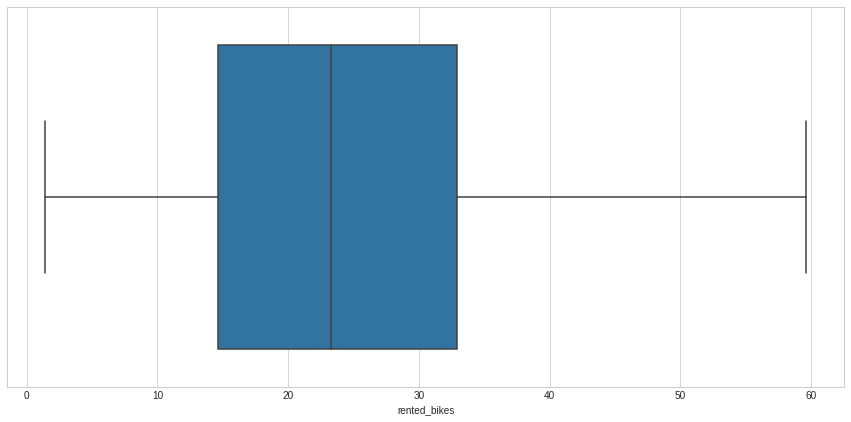

In [46]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.boxplot(x=np.sqrt(df['rented_bikes']))

plt.show()